# Group 7 Tidal Project

### Setting up and loading in the data

In [2]:
import numpy as np
from io import StringIO
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats

# converted to days (float) from days hours:minutes
data1 = np.genfromtxt("ASTR19_S22_group_project_data.txt",dtype=str,delimiter=",")
days_list = []
height_list = []
for data in data1:
    day,time,height = data.split()
    hour,minute = time.split(":")
    days = float(day)-1 + (float(hour) + float(minute) / 60) / 24
    #hours = (float(day)-1)*24 + float(hour) + float(minute) / 60
    days_list.append(round(days,2))
    height_list.append(float(height))
days = np.array(days_list)
height = np.array(height_list)

### Function to model the data

In [3]:
# this is the function we're going to optimize
def function(x, a, b, c, d, f, g, h):
    #return 2*a * np.sin(b * x + c) + d * np.sin(f * x + g) + h
    return a * np.sin(b * x + c) + d * np.sin(f * x + g) + h

def function2(x, a, b, c, d):
    return (a * -1 * np.sin(((2 * np.pi)/(b)) * x + c) + d)

### Optimizing the function

In [4]:
# RMSE = 0.25
sig = 0.25
y_err = np.full(len(days),sig)

# works the best p0=[4., 2.5, -3.8, 1.6, -6.8, -0.3, 1.7]

# fitting the function and specifying starting guesses
p0=[1.4, 1., -3.8, 1.6, -6.8, 3, 1.7]
params, params_covariance = optimize.curve_fit(function, days, height,sigma=y_err, p0=p0)

#params1, params_covariance2 = optimize.curve_fit(function2, days, height,sigma=y_err,p0=[0.5,2*np.pi,0.1,3])
#a, b, c, d = params1
#y_fit = function2(days, a, b, c, d)

# y_fit is the fitted function
a, b, c, d, f, g, h = params
y_fit = function(days, a, b, c, d, f, g, h)

### Plotting the results

Text(0, 0.5, 'Tide Height (ft)')

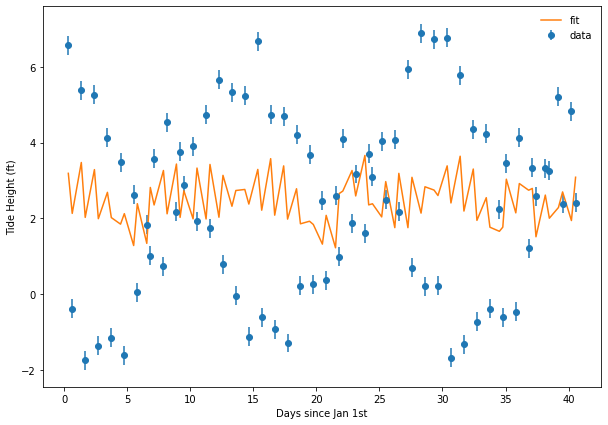

In [5]:
# Now let's plot the results
f = plt.figure(figsize=(10,7))

# plot the data points with error bars = RMSE (y_err)
plt.errorbar(days, height,yerr=y_err,fmt='o',label='data')

# plot the fitted function
plt.plot(days, y_fit, label='fit')

# add some detail to the plot
plt.legend(loc=0,frameon=False)
plt.xlabel("Days since Jan 1st")
plt.ylabel("Tide Height (ft)")

### Residual Plot

[3.3827042475160796, -2.5203727415875408, 1.9065510513421753, -3.76467846777751, 1.9743023822602974, -3.3504519110649005, 1.4440195632839141, -3.169114475631226, 1.6335967387359116, -3.7331101551481867, 1.3379203724220337, -2.3366750012480217, 0.49095458398503045, -1.8047908643299133, 1.2173422164324386, -2.532464832048433, 2.420597853262649, -1.26253171888749, 1.7353212413582026, 0.15334618553878254, 1.9131486265259066, -1.4065460516059076, 2.7473070727403144, -1.682153727260722, 3.630956187400591, -2.344269686040024, 3.0114841618601043, -2.774473648556527, 2.467904902763438, -3.496355042786887, 3.379212437000648, -2.8247298190069148, 1.1652786732303846, -3.0132122410324773, 1.3059001241028798, -3.2696919466865713, 1.4192570214709672, -1.6351414492509544, 1.7569142613441144, -1.5779248264978667, 1.150949001218533, -1.7182247528348333, 1.3674155114854958, -1.663886521551267, 1.3803059141421192, -1.3919672517663324, 0.578790815514497, -2.060157285400107, 1.3553051448318678, 0.7156224542

Text(0.5, 1.0, 'Residual Plot')

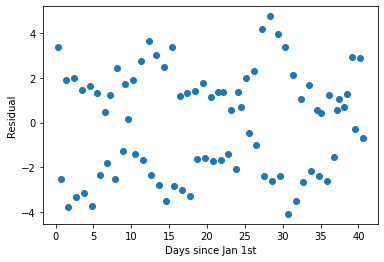

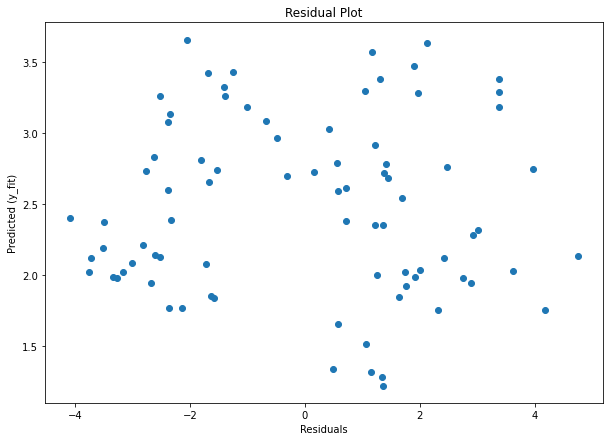

In [6]:
# calculate the residuals (observed - predicted)
residual_list = list(map(lambda real, pred: real - pred, height, y_fit))
print(residual_list)
plt.scatter(days,residual_list)
plt.xlabel("Days since Jan 1st")
plt.ylabel("Residual")

f = plt.figure(figsize=(10,7))
plt.scatter(residual_list,y_fit)
plt.xlabel("Residuals")
plt.ylabel("Predicted (y_fit)")
#plt.errorbar(days, height,yerr=std,fmt='o',label='residual w/std error')
#plt.plot(days, residual_list)
plt.title('Residual Plot')

Residual Histogram

The standard deviation of the residuals is 2.299751432638931


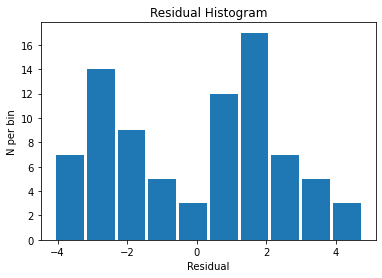

In [7]:
plt.hist(residual_list, rwidth=0.9)
plt.xlabel("Residual")
plt.ylabel("N per bin")
plt.title('Residual Histogram')

plt.savefig('histo.pdf', bbox_inches='tight', facecolor='white')

std = np.std(residual_list)
print(f"The standard deviation of the residuals is {std}")

Height Histogram With Outlier

The tsunami is 2.38064082624931 deviations, in terms of standard deviations of the distribution of normal tides, away from the model


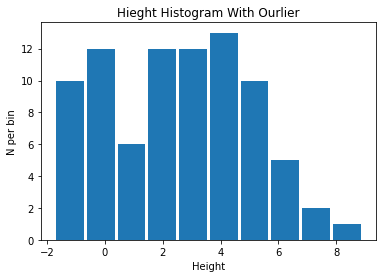

In [32]:
height_tsunami = max(height) + 2
height_normal = height[28]
std_normal = np.std(height)
#print(height_tsunami)
#print(height_normal)
#print(std_normal)
std_outlier = (height_tsunami - height_normal) / std_normal 
#print(std_outlier)
height_outlier = np.append(height, height_tsunami)
plt.hist(height_outlier, rwidth=0.9)
plt.xlabel("Height")
plt.ylabel("N per bin")
plt.title('Hieght Histogram With Ourlier')

std = np.std(height_outlier)
print(f"The tsunami is {std_normal} deviations, in terms of standard deviations of the distribution of normal tides, away from the model")